In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# #显示所有列
pd.set_option('display.max_columns', None)
# #显示所有行
# # pd.set_option('display.max_rows', None)
# #设置value的显示长度为100，默认为50
# pd.set_option('max_colwidth',100)
# DataFrame

In [3]:
df=pd.read_csv('DelayedFlights.csv')
df.head()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,N712SW,128.0,150.0,116.0,-14.0,8.0,IAD,TPA,810,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,N772SW,128.0,145.0,113.0,2.0,19.0,IAD,TPA,810,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,448,N428WN,96.0,90.0,76.0,14.0,8.0,IND,BWI,515,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,N464WN,90.0,90.0,77.0,34.0,34.0,IND,BWI,515,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,N726SW,101.0,115.0,87.0,11.0,25.0,IND,JAX,688,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [4]:
df.shape

(1936758, 30)

In [5]:
df['ArrDelay'].sample(50)

1452808     25.0
915201       1.0
567143      -2.0
77317        6.0
1105016    184.0
166148      14.0
1774390     49.0
1243207    132.0
1677246     17.0
1683725     32.0
429694      30.0
430490      33.0
585161       2.0
363574       2.0
526762       8.0
1333676    123.0
558588       1.0
632767      34.0
657860      -6.0
1158506     13.0
1894289     28.0
826310      12.0
321128       9.0
362423      -9.0
177544      42.0
1462546     19.0
789706      28.0
236446      95.0
1847087     58.0
572595      87.0
960993      10.0
879749       5.0
620781      12.0
1036331      4.0
961983       5.0
1765741     -5.0
753727      -7.0
1246112     54.0
128707      20.0
317734      15.0
1150036     23.0
298906       NaN
942335      45.0
1663791     80.0
1766169     55.0
1694482     15.0
583030      29.0
1125576     72.0
100353      34.0
1780547     23.0
Name: ArrDelay, dtype: float64

In [6]:
df = df.fillna({'ArrDelay': 0})

In [7]:
# 查看LateAircraftDelay列最大的前10个值
# 查看飞机延误时间最长的前10名航班
df_sorted = df.sort_values("ArrDelay", ascending=False)
df_sorted[['Year','Month','DayofMonth','FlightNum','DepDelay','ArrDelay','Origin','Dest']].head(10)

,Year,Month,DayofMonth,FlightNum,DepDelay,ArrDelay,Origin,Dest
322516,2008,2,3,808,2457.0,2461.0,HNL,MSP
686014,2008,4,10,1699,2467.0,2453.0,CLT,MSP
839306,2008,5,6,1107,1952.0,1951.0,RSW,DTW
1009553,2008,6,20,3538,1710.0,1707.0,LIT,DFW
1881639,2008,12,19,357,1597.0,1655.0,BOS,MSP
1497823,2008,9,1,512,1552.0,1583.0,OMA,MSP
685437,2008,4,27,1472,1545.0,1542.0,MOT,MSP
163379,2008,1,5,2398,1275.0,1525.0,EGE,MIA
1214839,2008,7,16,804,1518.0,1510.0,SEA,MSP
521096,2008,3,21,1743,1490.0,1490.0,BNA,MEM


In [8]:
# 计算延误的和没有延误的航空公司的比例。
delay=df.query("ArrDelay > 20")
print(len(delay))
len(delay)/(df.shape[0]-len(delay))

1066408


1.225263399781697

1066408
[13994, 1054, 62738, 145876, 194218, 241772, 264601, 141905]
1066158
-----
1066408
[80750, 5080, 20718, 89648, 152692, 202940, 256511, 257073]
1065412


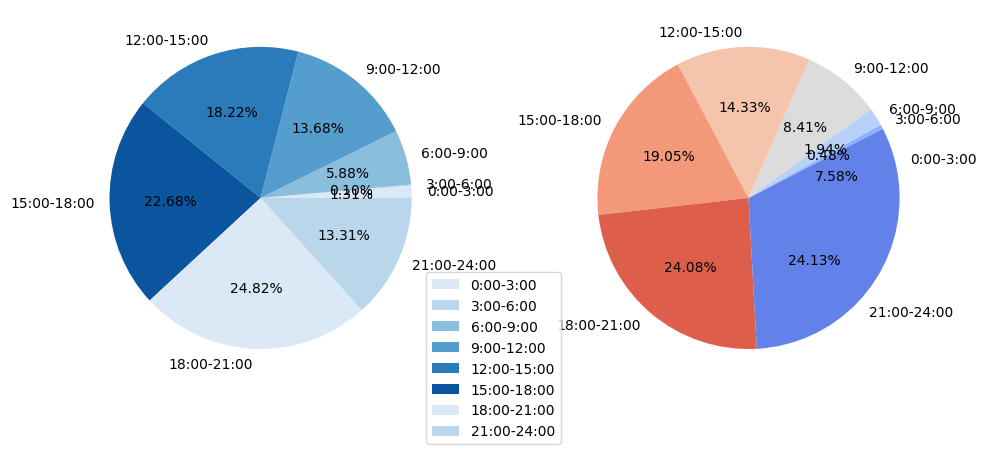

1066408
[159580, 146004, 142847, 158721, 184240, 116196, 158820]
1066408


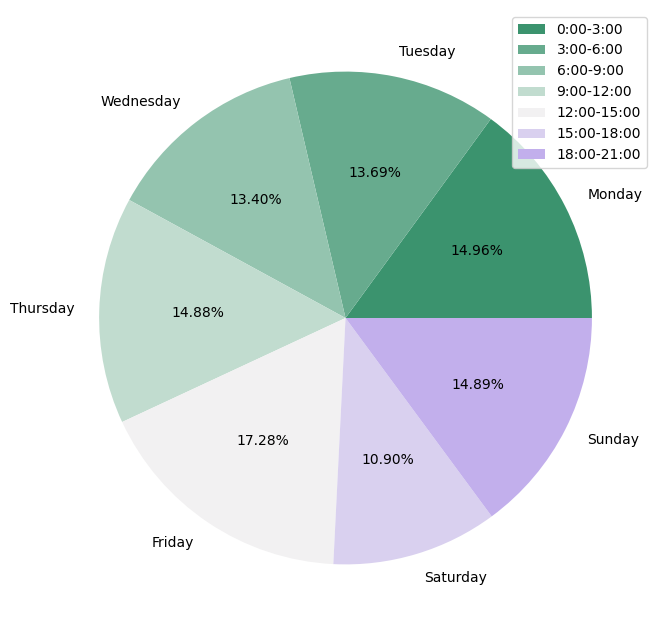

In [9]:
# 分析一天中、一周中延误最严重的飞行时间。

# 获取每天延误最严重的时间
# 将一天分为8个时间段，0:00-3:00为第一时间段，以此类推。
# 以此来判断一天中哪个时间段延误最严重。
dep_delays=[]
for i in range(8):
    temp_data=delay.query(f"DepTime  >= {300*i} and DepTime < {(3*i+3)*100}")
    dep_delays.append(len(temp_data))
print(len(delay))
print(dep_delays)
print(sum(dep_delays))
print('-----')
arr_delays=[]
for i in range(8):
    temp_data=delay.query(f"ArrTime  >= {300*i} and ArrTime < {(3*i+3)*100}")
    arr_delays.append(len(temp_data))
print(len(delay))
print(arr_delays)
print(sum(arr_delays))
time_periods=[f"{3*i}:00-{3*i+3}:00"for i in range(8)]
# 创建子图
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
# 设置配色方案
palette1 = sns.color_palette("Blues")
palette2 = sns.color_palette("coolwarm", 7)
# 制作饼状图 1
axes[0].pie(dep_delays, labels=time_periods, autopct="%.2f%%",colors=palette1 )
# 制作饼状图 2
axes[1].pie(arr_delays, labels=time_periods, autopct="%.2f%%",colors=palette2)
fig.legend(time_periods, loc='lower center')
plt.tight_layout()
# 显示图形
plt.show()

# 获取每天延误最严重的时间
week_time=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
dep_delays_week=[]
for i in range(7):
    temp_data=delay.query(f"DayOfWeek =={i+1}")
    dep_delays_week.append(len(temp_data))
print(len(delay))
print(dep_delays_week)
print(sum(dep_delays_week))
# 制作饼状图
plt.figure(figsize=(8, 8))
palette3 = sns.diverging_palette(150, 275, s=80, l=55, n=9)
plt.pie(dep_delays_week, labels=week_time, autopct="%.2f%%",colors=palette3)
plt.legend(time_periods, loc='best')
# 显示图形
plt.show()

In [10]:
# 短途航班和长途航班，哪种航班取消更严重？
cancelled_flight=df.query('Cancelled == 1')
print(len(cancelled_flight))
short_haul_flight,long_haul_flight=cancelled_flight.query('Distance < 800'),cancelled_flight.query('Distance >= 800')
len(short_haul_flight),len(long_haul_flight)

633


(475, 158)

In [11]:
# 建立机器学习算法模型，预测未来航班取消情况。
# 处理缺省值
df.isnull().values.any()#是否存在缺失值

True

In [12]:
df.isnull().sum()

Unnamed: 0                0
Year                      0
Month                     0
DayofMonth                0
DayOfWeek                 0
DepTime                   0
CRSDepTime                0
ArrTime                7110
CRSArrTime                0
UniqueCarrier             0
FlightNum                 0
TailNum                   5
ActualElapsedTime      8387
CRSElapsedTime          198
AirTime                8387
ArrDelay                  0
DepDelay                  0
Origin                    0
Dest                      0
Distance                  0
TaxiIn                 7110
TaxiOut                 455
Cancelled                 0
CancellationCode          0
Diverted                  0
CarrierDelay         689270
WeatherDelay         689270
NASDelay             689270
SecurityDelay        689270
LateAircraftDelay    689270
dtype: int64

In [13]:
origin_dict,dest_dict={},{}
origin_array,dest_array=df['Origin'].unique(),df['Dest'].unique()
origin_dict=dict(zip(origin_array,range(len(sorted(origin_array)))))
dest_dict=dict(zip(dest_array,range(len(sorted(dest_array)))))

In [14]:
len(sorted(origin_array)),len(sorted(dest_array))

(303, 304)

In [15]:
df['OriginCode']=df['Origin'].map(origin_dict)
df['DestCode']=df['Dest'].map(dest_dict)

In [16]:
df=df[['Month','DayofMonth','DayOfWeek','CRSDepTime',
       'CRSArrTime','OriginCode','DestCode','Distance','Cancelled']]

In [17]:
df.isnull().sum()

Month         0
DayofMonth    0
DayOfWeek     0
CRSDepTime    0
CRSArrTime    0
OriginCode    0
DestCode      0
Distance      0
Cancelled     0
dtype: int64

In [18]:
# 构建模型
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
train_x, test_x, train_y, test_y = train_test_split(df.drop('Cancelled', axis=1), df['Cancelled'], test_size=0.2, random_state=25)

In [19]:
model = RandomForestClassifier(random_state=15)
model.fit(train_x, train_y)

RandomForestClassifier(random_state=15)

In [20]:
predicted = model.predict(test_x)
model.score(test_x, test_y)

0.9996876226274809

In [21]:
from sklearn.metrics import roc_auc_score
probabilities = model.predict_proba(test_x)

In [22]:
roc_auc_score(test_y, probabilities[:, 1])

0.6482372755006474

In [23]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test_y, predicted)

array([[387231,      1],
       [   120,      0]], dtype=int64)

In [24]:
from sklearn.metrics import precision_score

train_predictions = model.predict(train_x)
precision_score(train_y, train_predictions)

1.0

In [25]:
from sklearn.metrics import recall_score

recall_score(train_y, train_predictions)

0.9961013645224172

In [26]:
def predict_delay(departure_date_time,arrtime, origin, destination,distance):
    from datetime import datetime

    try:
        departure_date_time_parsed = datetime.strptime(departure_date_time, '%d/%m/%Y %H:%M:%S')
    except ValueError as e:
        return 'Error parsing date/time - {}'.format(e)

    try:
        arrive_date_time_parsed = datetime.strptime(arrtime, '%H:%M:%S')
    except ValueError as e:
        return 'Error parsing date/time - {}'.format(e)
    
    month = departure_date_time_parsed.month
    day = departure_date_time_parsed.day
    day_of_week = departure_date_time_parsed.isoweekday()
    depTime = departure_date_time_parsed.hour*100+departure_date_time_parsed.minute
    arrTime=arrive_date_time_parsed.hour*100+arrive_date_time_parsed.minute
    originCode = origin_dict[origin]
    destCode = dest_dict[destination]

    input = [{'Month': month,
              'DayofMonth': day,
              'DayOfWeek': day_of_week,
              'CRSDepTime': depTime,
              'CRSArrTime': arrTime,
              'OriginCode': originCode,
              'DestCode': destCode,
              'Distance': distance}]

    return model.predict_proba(pd.DataFrame(input))[0][0]

predict_delay('3/1/2008 7:35:00', '10:00:00','IAD', 'TPA',900)

0.94


In [ ]:
predict_delay('1/10/2018 21:45:00', 'ATL', 'SEA')
predict_delay('1/10/2018 21:45:00', '22:45:00','IAD', 'JAX',860)

In [1]:
import torch


<module 'torch.version' from 'F:\\Env\\anaconda\\Lib\\site-packages\\torch\\version.py'>

In [3]:
torch.__version__

'1.13.0'

In [2]:
!nvidia-smi

Sun Jan 28 18:06:05 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 546.33                 Driver Version: 546.33       CUDA Version: 12.3     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce GTX 1660 Ti   WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A   63C    P0              25W /  80W |      0MiB /  6144MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--